In [1]:
import pandas as pd
from matplotlib import  pyplot as plt

In [34]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


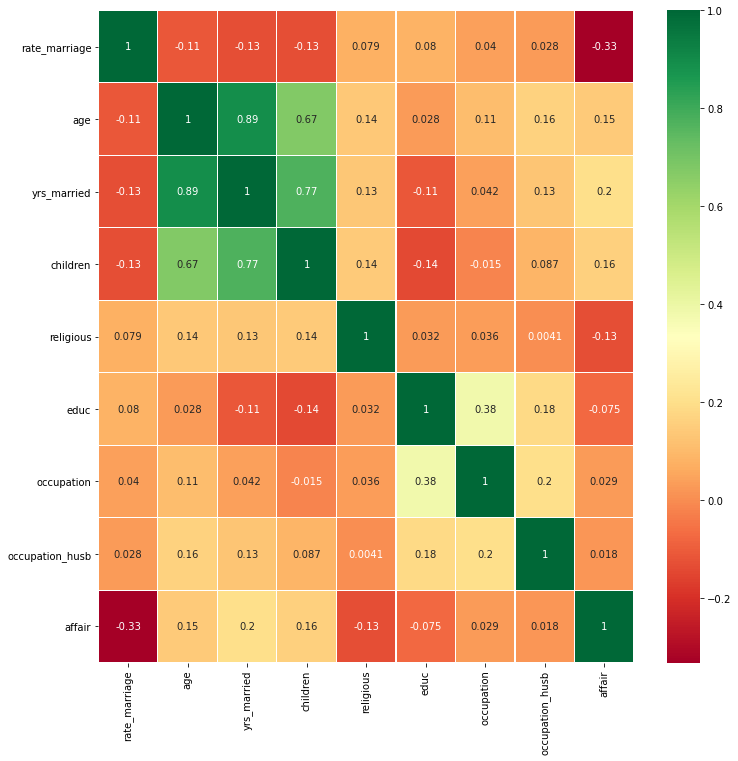

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [57]:
data2 = data[ ['rate_marriage', 'yrs_married', 'children', 'occupation', 'occupation_husb', 'affair']]

In [58]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [59]:
X = data2[data2.columns[:-1]]
y = data['affair']

X.head()

,rate_marriage,yrs_married,children,occupation,occupation_husb
0,3.0,9.0,3.0,2.0,5.0
1,3.0,13.0,3.0,3.0,4.0
2,4.0,2.5,0.0,3.0,5.0
3,4.0,16.5,4.0,5.0,5.0
4,5.0,9.0,1.0,3.0,4.0


In [60]:

model = LogisticRegression()

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [62]:
model.fit(X_train, Y_train)

LogisticRegression()

In [63]:
model.score(X_train, Y_train)

0.7125224416517055

In [64]:
from sklearn.metrics import roc_curve
probs = model.predict_proba(X_test)
predictions = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, predictions)

In [65]:
threshold = 0
TPR = []
FPR = []
count = list(Y_test.value_counts().items())
if count[0][0] == 0:
    N = count[0][1]
    P = count[1][1]
else:
    N = count[1][1]
    P = count[0][1]

while threshold <= 1:
    TP = 0
    FP = 0
    for predicted_prob, actual in zip( predictions, Y_test ):
        if predicted_prob >= threshold:
            if actual == 1:
                TP += 1
            else:
                FP += 1
    TPR.append(TP / P)  
    FPR.append(FP / N) 
    threshold += 0.01 

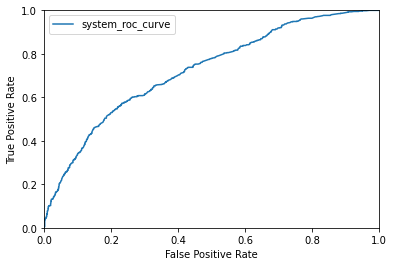

In [66]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'system_roc_curve')
plt.legend( loc = 0 )
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

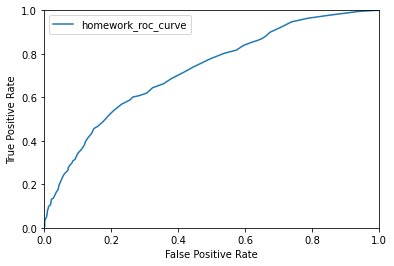

In [67]:
import matplotlib.pyplot as plt
plt.plot(FPR, TPR, label = 'homework_roc_curve')
plt.legend( loc = 0 )
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

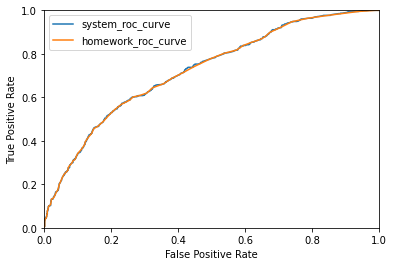

In [68]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'system_roc_curve')
plt.plot(FPR, TPR, label = 'homework_roc_curve')
plt.legend( loc = 0 )
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()